In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from glob import glob
sns.set()

In [9]:
cond = '/data/logs/1p1-fake-var05-2018-10-12-1907/canonical_bm_fake_var/run_2/'

In [10]:
fits = []
for i, rep in enumerate(sorted(glob(cond + '/rep*'))):
    fit = pd.read_csv(rep + '/fitnesslog.txt', delimiter='\t')
    fit['megarep'] = i
    fits.append(fit)

In [11]:
fits = pd.concat(fits)

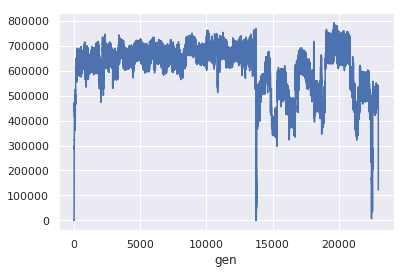

In [12]:
fits.groupby(['gen', 'ind'])['fitness'].sum().groupby('gen').median().plot()

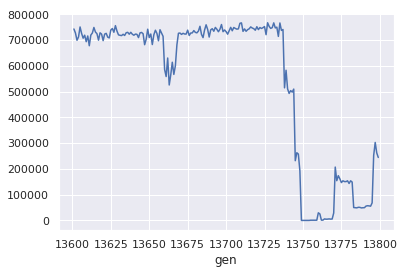

In [18]:
fits.query('13600<gen<13800').groupby(['gen', 'ind'])['fitness'].sum().groupby('gen').median().plot()

In [16]:
fits['role'] = np.where(fits['ind'] < 90, 'resident', 'mutant')

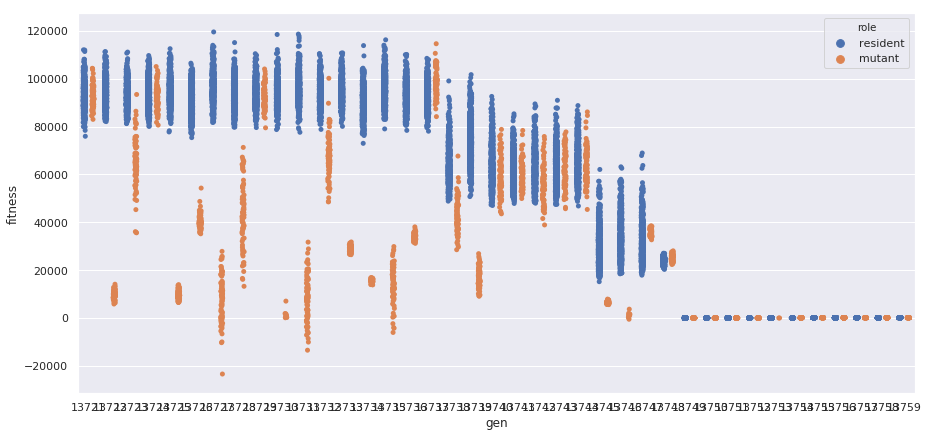

In [19]:
fig, ax = plt.subplots(1, 1, figsize=(15, 7))
sns.stripplot(x='gen', y='fitness', hue='role', data=fits.query('13720 < gen < 13760 and fitness != 0'), ax=ax, dodge=True, jitter=True)

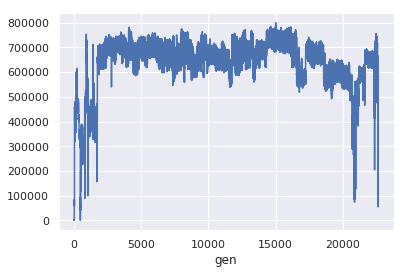

In [9]:
fits.groupby(['gen', 'ind'], as_index=False)['fitness'].sum().groupby('gen')['fitness'].median()[:-1].plot()